# Proyecto primer bimestre de python

# Análisis de datos de FIFA 19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
path = 'C:\\Users\Gorky\Documents\GitHub\py-munoz-galvan-gorky-andres\ProyectoPrimerBimestre\data\data.csv'

In [12]:
df = pd.read_csv(path,index_col=['ID'])

In [2]:
path_guardado = 'C:\\Users\Gorky\Documents\GitHub\py-munoz-galvan-gorky-andres\ProyectoPrimerBimestre\data\data.pickle'

In [3]:
df_pickle = pd.read_pickle(path_guardado)

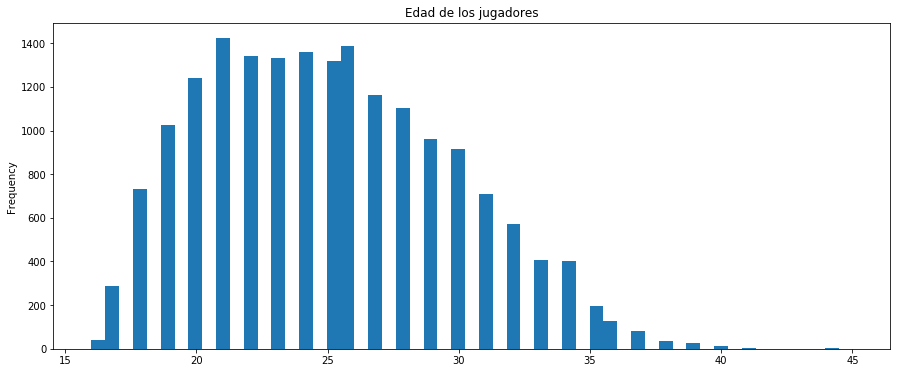

In [4]:
plt.figure(1 , figsize = (15 , 6))
df_pickle['Age'].plot(kind = 'hist' , bins = 55)
plt.title('Edad de los jugadores')
plt.show()

In [22]:
df_pie_izquierdo = df_pickle[df_pickle['Preferred Foot'] == 'Left']
df_pie_derecho = df_pickle[df_pickle['Preferred Foot'] == 'Right']

In [23]:
df_pie_derecho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13948 entries, 20801 to 246269
Data columns (total 88 columns):
Unnamed: 0                  13948 non-null int64
Name                        13948 non-null object
Age                         13948 non-null int64
Photo                       13948 non-null object
Nationality                 13948 non-null object
Flag                        13948 non-null object
Overall                     13948 non-null int64
Potential                   13948 non-null int64
Club                        13756 non-null object
Club Logo                   13948 non-null object
Value                       13948 non-null object
Wage                        13948 non-null object
Special                     13948 non-null int64
Preferred Foot              13948 non-null object
International Reputation    13948 non-null float64
Weak Foot                   13948 non-null float64
Skill Moves                 13948 non-null float64
Work Rate                   13948 non-

In [5]:
df_stats = df_pickle.iloc[:,-19:-9]

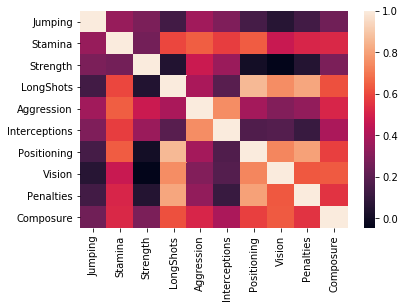

In [37]:
sns.heatmap(data=df_stats.corr())

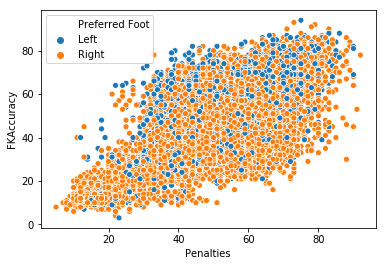

In [28]:
sns.scatterplot(x='Penalties',y='FKAccuracy',data=df_pickle,hue='Preferred Foot')

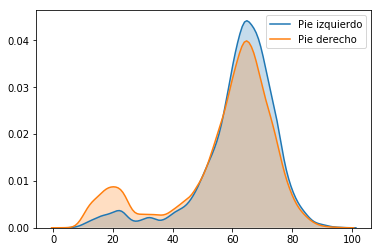

In [26]:
sns.kdeplot(data=df_pie_izquierdo['BallControl'],shade=True,label='Pie izquierdo')
sns.kdeplot(data=df_pie_derecho['BallControl'],shade=True,label='Pie derecho')

In [8]:
df_datos_importantes = df_pickle[['Name','Age','Club','Wage','Value','Nationality','Overall','Preferred Foot','Position']]

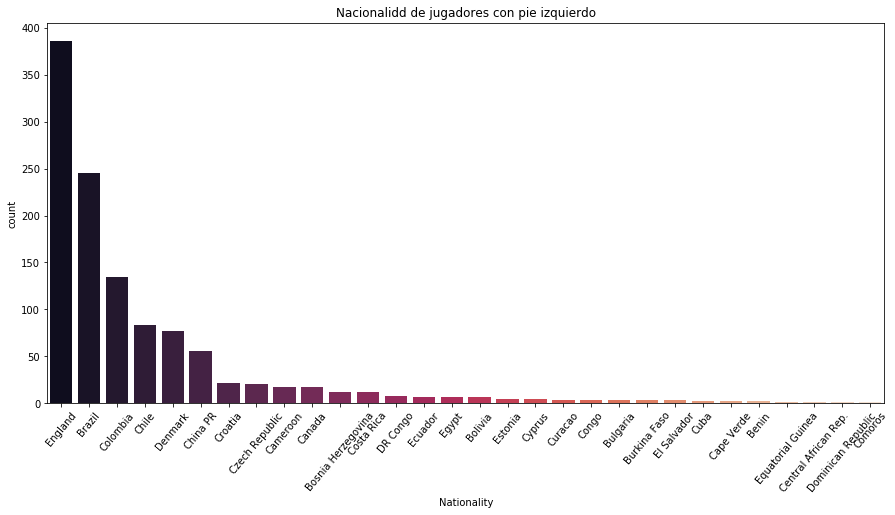

In [165]:
df_datos_importantes_pie_izquierdo = df_datos_importantes[df_datos_importantes['Preferred Foot'] == 'Left']


countries = df_datos_importantes_pie_izquierdo['Nationality'].sort_values().unique()
countries

countries_limitado = countries[10:40]


plt.figure(1 , figsize = (15 , 7))

sns.countplot(x  = 'Nationality' ,
              data = df_datos_importantes_pie_izquierdo[df_datos_importantes_pie_izquierdo['Nationality'].isin(countries_limitado)] ,
              order  = df_datos_importantes_pie_izquierdo[df_datos_importantes_pie_izquierdo['Nationality'].isin(countries_limitado)]['Nationality'].value_counts().index , 
             palette = 'rocket') 
plt.xticks(rotation = 50)
plt.title('Nacionalidd de jugadores con pie izquierdo' )
plt.show()


In [63]:
jugadores_ecuatorianos = df_datos_importantes[df_datos_importantes['Nationality'] == 'Ecuador']

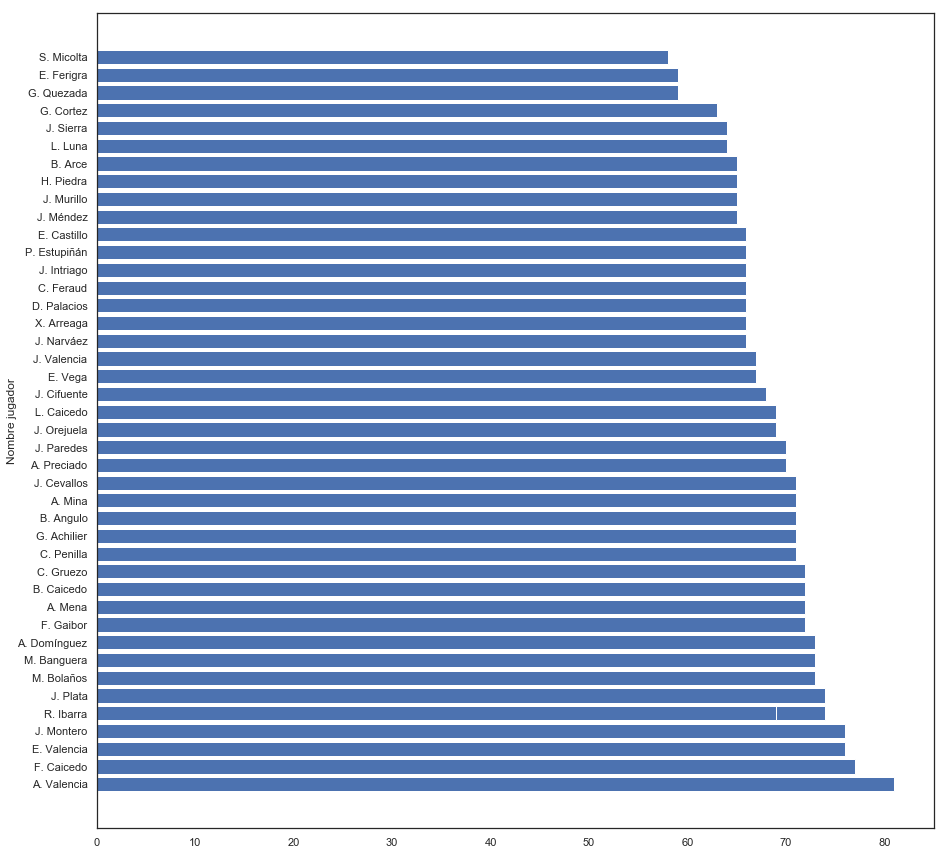

In [61]:
plt.figure(3 , figsize = (15 , 15))
jugadores_ecuatorianos=jugadores_ecuatorianos.sort_values(by='Overall',ascending=False)
plt.barh(y='Name',width='Overall',data=jugadores_ecuatorianos)
plt.ylabel(labelpad=0.2,ylabel='Nombre jugador')
plt.show()

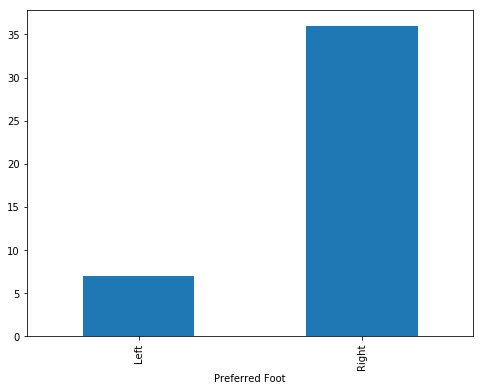

In [98]:
plt.figure(3 , figsize = (8 , 6))
jugadores_ecuatorianos.groupby(['Preferred Foot'])['Name'].count().plot(kind='bar')
plt.show()

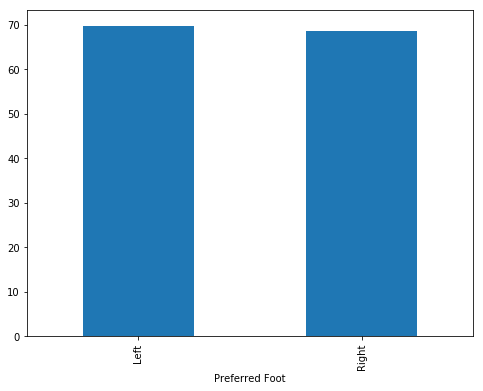

In [99]:
plt.figure(3 , figsize = (8 , 6))
jugadores_ecuatorianos.groupby(['Preferred Foot'])['Overall'].mean().plot(kind='bar')
plt.show()

# Los 10 jugadores más jóvenes en fifa 19

# Los 10 jugadores más viejos en el fifa 19

In [171]:
df_pickle.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality'
                                               ,'Overall', 'Age','Value' ]].head(10)

,Name,Club,Nationality,Overall,Age,Value
ID,,,,,,
140029,O. Pérez,Pachuca,Mexico,71,45,€160K
53748,K. Pilkington,Cambridge United,England,48,44,€0
51963,T. Warner,Accrington Stanley,Trinidad & Tobago,53,44,€0
140183,S. Narazaki,Nagoya Grampus,Japan,65,42,€40K
142998,C. Muñoz,CD Universidad de Concepción,Argentina,68,41,€60K
156092,J. Villar,NaN,Paraguay,77,41,€0
208927,H. Sulaimani,Ohod Club,Saudi Arabia,63,41,€0
18745,M. Tyler,Peterborough United,England,59,41,€10K
3665,B. Nivet,ESTAC Troyes,France,71,41,€0


In [12]:
def transformarPrecio(precio):
    if '€' in str(precio) and 'M' in str(precio):
        c = str(precio).replace('€','')
        c = str(c).replace('M','')
        c = float(c)*1000000
    else:
        c = str(precio).replace('€','')
        c = str(c).replace('K','')
        c = float(c)*1000
    return c
limpiar = lambda precio: transformarPrecio(precio)
df_datos_importantes_copy = df_datos_importantes.copy()
df_datos_importantes_copy['Value_num'] = df_datos_importantes_copy['Value'].apply(limpiar)
df_datos_importantes_copy['Wage_num'] = df_datos_importantes_copy['Wage'].apply(limpiar)

In [26]:
df_jugadores_viejos =df_datos_importantes_copy.sort_values(by = 'Age' , ascending = True)[['Name','Age','Club','Nationality'
                                               ,'Overall','Value_num','Wage_num' ]].head(10)
df_jugadores_viejos=df_jugadores_viejos.sort_values(by='Value_num')
df_jugadores_viejos

,Name,Age,Club,Nationality,Overall,Value_num,Wage_num
ID,,,,,,,
246269,G. Nugent,16,Tranmere Rovers,England,46,60000.0,1000.0
243722,B. O'Gorman,16,Bray Wanderers,Republic of Ireland,50,60000.0,1000.0
243621,N. Ayéva,16,Örebro SK,Sweden,48,70000.0,1000.0
244752,J. Olstad,16,Sarpsborg 08 FF,Norway,52,100000.0,1000.0
245470,K. Broda,16,Wisła Kraków,Poland,53,110000.0,1000.0
242240,L. D'Arrigo,16,Adelaide United,Australia,54,130000.0,1000.0
243646,B. Nygren,16,IFK Göteborg,Sweden,56,180000.0,1000.0
241552,J. Italiano,16,Perth Glory,Australia,58,280000.0,1000.0
246594,H. Massengo,16,AS Monaco,France,62,450000.0,2000.0


In [58]:
df_jugadores_jovenes = df_datos_importantes_copy.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality'
                                               ,'Overall', 'Age','Value_num' ]].head(10)
df_jugadores_jovenes.sort_values(by='Value_num',ascending = True)

,Name,Club,Nationality,Overall,Age,Value_num
ID,,,,,,
53748,K. Pilkington,Cambridge United,England,48,44,0.0
51963,T. Warner,Accrington Stanley,Trinidad & Tobago,53,44,0.0
3665,B. Nivet,ESTAC Troyes,France,71,41,0.0
156092,J. Villar,NaN,Paraguay,77,41,0.0
208927,H. Sulaimani,Ohod Club,Saudi Arabia,63,41,0.0
18745,M. Tyler,Peterborough United,England,59,41,10000.0
219344,A. Al Basisi,Ohod Club,Saudi Arabia,57,40,10000.0
140183,S. Narazaki,Nagoya Grampus,Japan,65,42,40000.0
142998,C. Muñoz,CD Universidad de Concepción,Argentina,68,41,60000.0


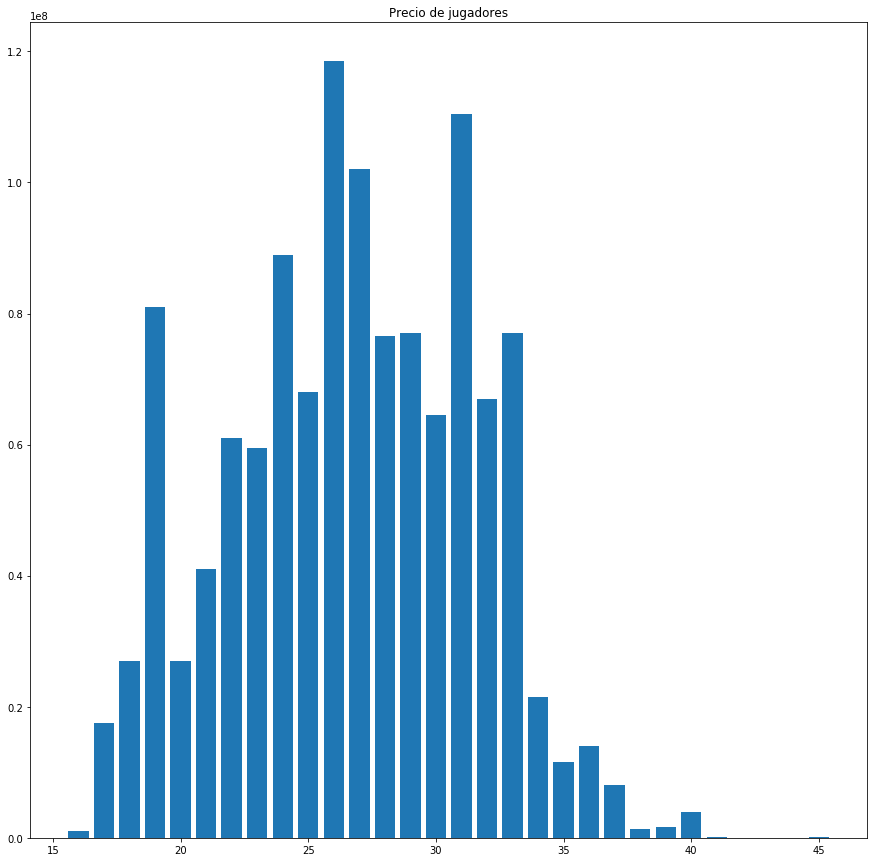

In [28]:
plt.figure(3 , figsize = (15 , 15))
df_datos_importantes_copy = df_datos_importantes_copy.sort_values(by='Value_num',ascending=True)
plt.bar(x='Age',height='Value_num',data=df_datos_importantes_copy)
plt.title('Precio de jugadores' )
plt.show()

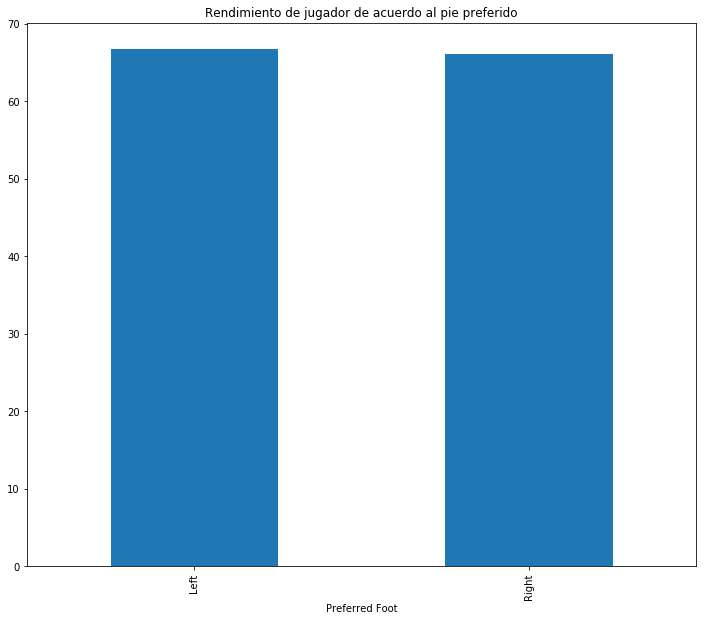

In [40]:
plt.figure(4 , figsize = (12 , 10))
df_pickle.groupby(['Preferred Foot'])['Overall'].mean().plot(kind='bar')
plt.title('Rendimiento de jugador de acuerdo al pie preferido' )
plt.show()

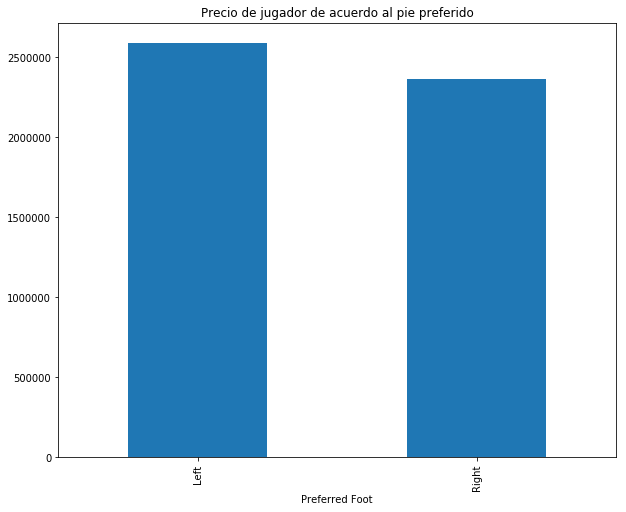

In [41]:
plt.figure(4 , figsize = (10 , 8))
df_datos_importantes_copy.groupby(['Preferred Foot'])['Value_num'].mean().plot(kind='bar')
plt.title('Precio de jugador de acuerdo al pie preferido' )
plt.show()


<Figure size 720x576 with 0 Axes>

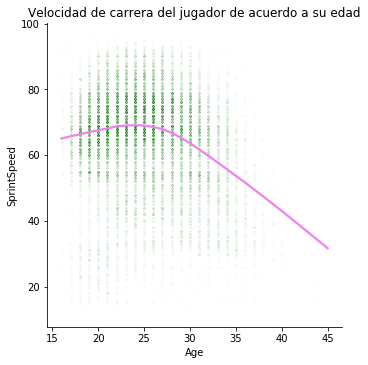

In [46]:
plt.figure(5 , figsize = (10 , 8))
sns.lmplot(data = df_pickle, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'violet'})
plt.title('Velocidad de carrera del jugador de acuerdo a su edad' )
plt.show()

<Figure size 720x720 with 0 Axes>

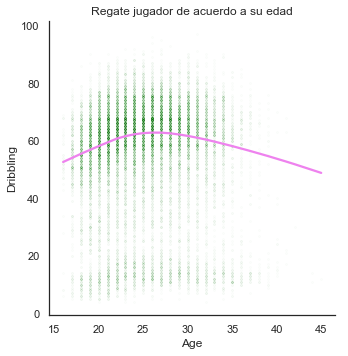

In [59]:
plt.figure(5 , figsize = (10 , 10))
sns.lmplot(data = df_pickle, x = 'Age', y = 'Dribbling',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'violet'})
plt.title('Regate jugador de acuerdo a su edad' )
plt.show()

<Figure size 720x576 with 0 Axes>

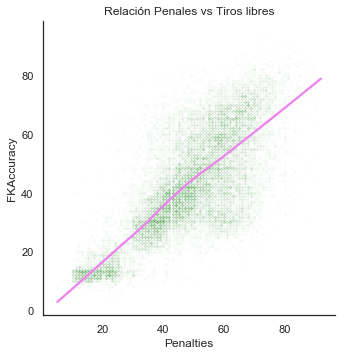

In [52]:
plt.figure(5 , figsize = (10 , 8))
sns.lmplot(data = df_pickle, x = 'Penalties', y = 'FKAccuracy',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'violet'})
plt.title('Relación Penales vs Tiros libres' )
plt.show()

<Figure size 720x576 with 0 Axes>

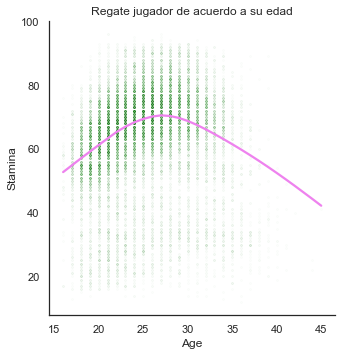

In [54]:
plt.figure(5 , figsize = (10 , 8))
sns.lmplot(data = df_pickle, x = 'Age', y = 'Stamina',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'violet'})
plt.title('Regate jugador de acuerdo a su edad' )
plt.show()

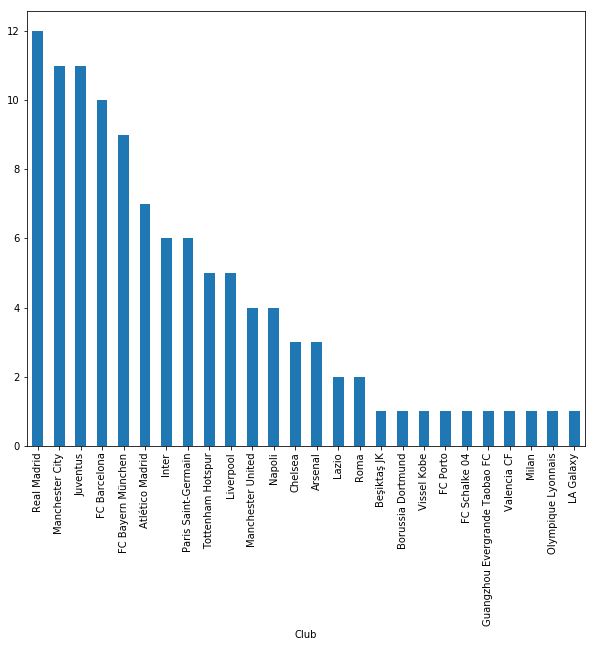

In [41]:
talents_df = df_pickle.filter(["Name", "Club", "Overall"])
talents_df = talents_df[talents_df.Overall >= 85]
plt.figure(5 , figsize = (10 , 8))
df_asd = talents_df.groupby(['Club'])['Overall'].count()
df_asd.sort_values(ascending=False).plot(kind='bar')


In [50]:
talents_df = talents_df.groupby("Club").count()
talents_df = talents_df.sort_values(by=['Name'],ascending=False)
top_ten_clubs = talents_df[:10]
top_ten_clubs = list(top_ten_clubs.index.values)

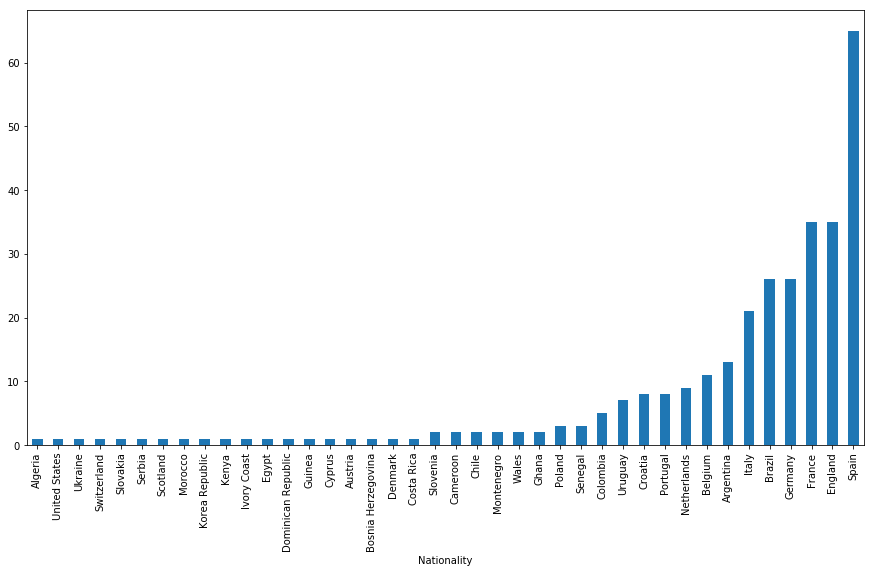

In [45]:
top_ten_clubs_data = df_datos_importantes_copy.loc[df_datos_importantes_copy['Club'].isin(top_ten_clubs), :]
top_ten_clubs_data
plt.figure(5 , figsize = (15 , 8))
top_ten_clubs_data=top_ten_clubs_data.groupby(['Nationality'])['Club'].count()
top_ten_clubs_data.sort_values().plot(kind='bar')


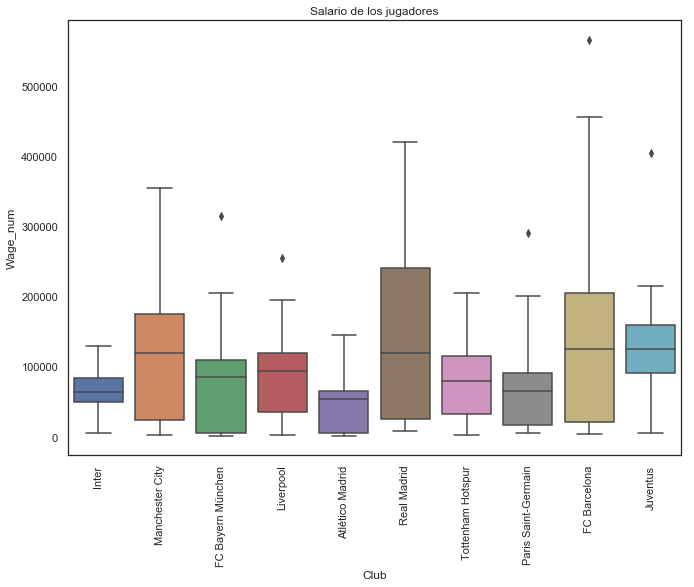

In [49]:
top_ten_clubs_data = df_datos_importantes_copy.loc[df_datos_importantes_copy['Club'].isin(top_ten_clubs), :]
sns.set(style="white")
plt.figure(figsize=(11,8))
p = sns.boxplot(x = 'Club', y = 'Wage_num', data = top_ten_clubs_data)
p = plt.xticks(rotation=90)
p = plt.title('Salario de los jugadores')

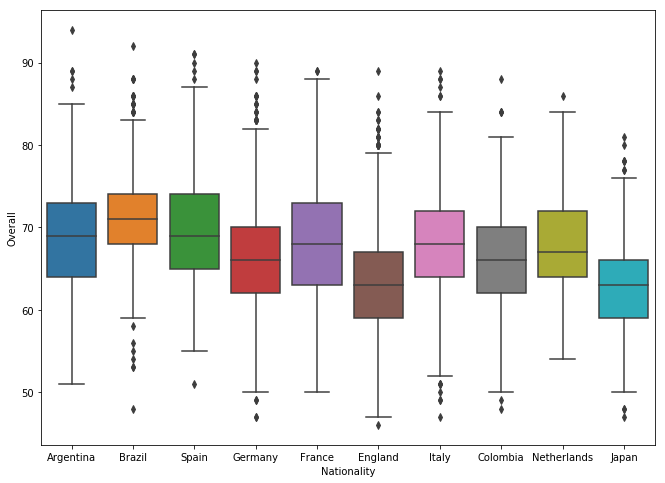

In [5]:
top_ten_countries = df_pickle['Nationality'].value_counts().head(10).index.values
top_ten_countries_data = df_pickle.loc[df_pickle['Nationality'].isin(top_ten_countries), :]

plt.figure(figsize=(11, 8))
p = sns.boxplot(x = 'Nationality', y = 'Overall', data = top_ten_countries_data)